In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f" dataset has {df.shape[0]} rows and {df.shape[1]} columns")

 dataset has 1338 rows and 7 columns


In [6]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

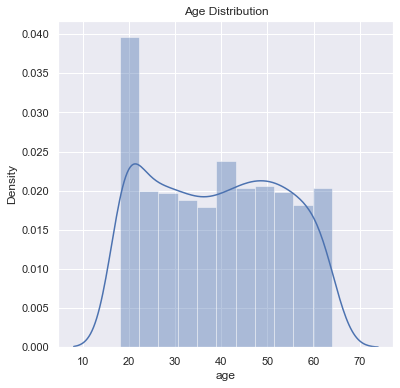

In [9]:
# Age distribution 
sns.set() # to make the grid lines 
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

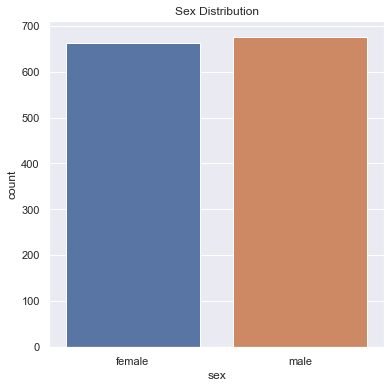

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

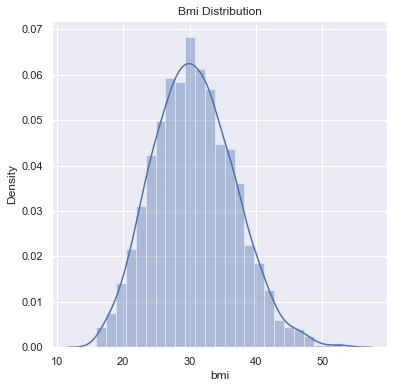

In [12]:
# BMI distribution 
sns.set() # to make the grid lines 
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('Bmi Distribution')
plt.show()

The Normal weight: BMI between 18.5 and 24.9 => and in our distribution we have more number of values between 25 and 40, so it's between the overweight and obesity and this can affect the insurance charges 

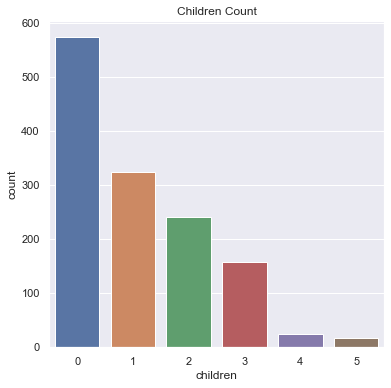

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
# children count 
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Count')
plt.show()


df['children'].value_counts()

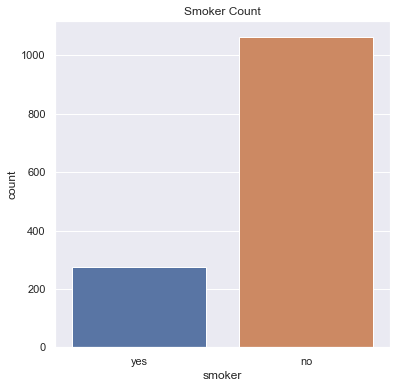

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
# smoker count
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Count')
plt.savefig('smoker.png', format='png')
plt.show()

df['smoker'].value_counts()

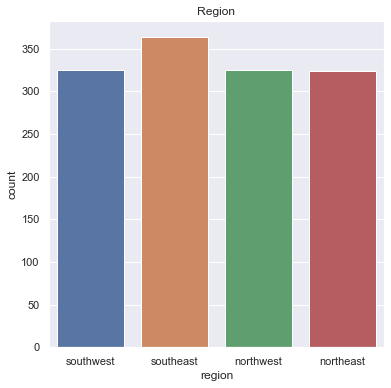

In [20]:
# Region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

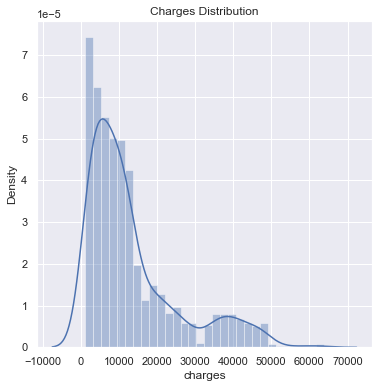

In [20]:
# BMI distribution 
sns.set() # to make the grid lines 
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [25]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


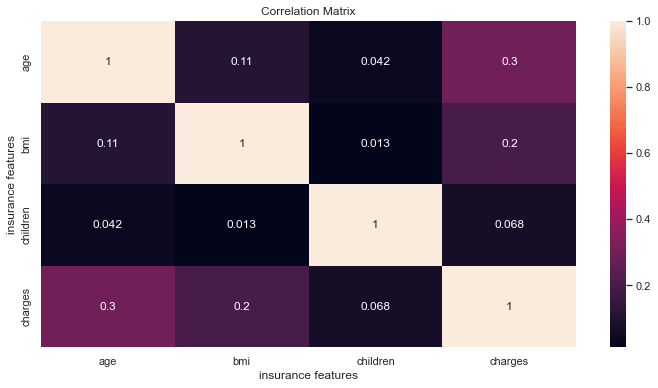

In [23]:
# correlation between different features of the dataset
correlation_matrix = df.corr(method='pearson', numeric_only = True)
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("insurance features")
plt.ylabel("insurance features")
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

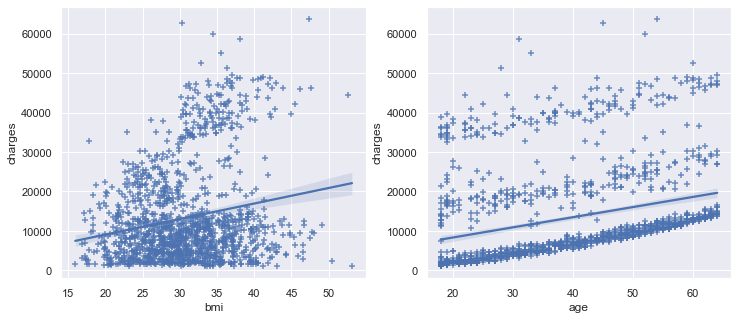

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.regplot(data = df, x= 'bmi', y= 'charges', marker = '+')
plt.subplot(1,2,2)
sns.regplot(data = df, x= 'age', y= 'charges', marker = '+')


In [24]:
tempdata = df
# dummies =  pd.get_dummies(tempdata,columns=['sex'])

#replacing the sex column with numerical vars
tempdata.replace({'sex':{'male':0 , 'female': 1}}, inplace = True)
                  
#replacing the smoker column with numerical vars
tempdata.replace({'smoker':{'yes':0 , 'no': 1}}, inplace = True)

#replacing the region column with numerical vars
tempdata.replace({'region':{'southeast':0 , 'southwest': 1, 'northeast':2, 'northwest':3}}, inplace = True)

tempdata

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [25]:
X = tempdata.drop(columns = 'charges')
y = tempdata['charges']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


In [31]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(936, 6) (402, 6) (936,) (402,)


In [59]:
#cross validation on linear regression and random forrest regressor

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model_2 = RandomForestRegressor()
model_3 =  Ridge(alpha=1) 


scores = cross_val_score(model, X, y, cv=3)
scores_forrest = cross_val_score(model_2, X, y, cv=3)
cv_scores = cross_val_score(model_3, X, y, cv=3)

print("Cross-validation scores:", scores)
print("Cross-validation scores:", scores_forrest)
print("Ridge scores",cv_scores)

Cross-validation scores: [0.75241617 0.75571265 0.72770185]
Cross-validation scores: [0.84242946 0.84025093 0.82116368]
Ridge scores [0.75269995 0.75508341 0.72796277]


In [32]:
lr = LinearRegression()


In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
print(f"Accuracy of the Linear model on train data :",lr.score(X_train,y_train))
print(f"Accuracy of the Linear model on test data :",lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :",mse)

Accuracy of the Linear model on train data : 0.730400823808963
Accuracy of the Linear model on test data : 0.7907514220754801
MSE : 33368758.79656716


In [61]:
ridge = Ridge(alpha=1) 
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=10) 
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [63]:
ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge Regression Score:", ridge_score)
print("Lasso Regression Score:", lasso_score)

Ridge Regression Score: 0.7902874068682703
Lasso Regression Score: 0.7904983055518111


In [67]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Random Forrest score for train data:",rf_regressor.score(X_train,y_train))
print("Random Forrest score for test data:",rf_regressor.score(X_test,y_test))

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Random Forrest score for train data: 0.9750324502764466
Random Forrest score for test data: 0.8649744969226164
Mean Squared Error: 21532444.751904707
R^2 Score: 0.8649744969226164


In [65]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20]
}
rf_reg = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_reg, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 200}
Best Score: 0.8351288487462396


In [80]:
rf_regressor_final = RandomForestRegressor(n_estimators= 200,max_depth= 5,random_state=42)
rf_regressor_final.fit(X_train,y_train)

y_pred_ = rf_regressor_final.predict(X_test)
r2 = r2_score(y_test, y_pred_)
print("Score on train data",rf_regressor_final.score(X_train,y_train))
print("score on test data",rf_regressor_final.score(X_test,y_test))
mse = mean_squared_error(y_test, y_pred_)
print("MSE: ",mse)
print("R2: ", r2)

Score on train data 0.8821707840773475
score on test data 0.8849746681743296
MSE:  18343028.140293647
R2:  0.8849746681743296


## Make a Prediction with an input 

In [81]:
prediction = rf_regressor_final.predict([[31,1,25.74,0,1,0]])
print('The insurance cost is ', prediction[0], '$')

The insurance cost is  4886.4776029241775 $
